<div align="center" style="font-size: 40%; text-align: center; margin: 0 auto">
  <img src="https://media.licdn.com/dms/image/v2/D4E03AQFyxl108wiYdQ/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1731075663012?e=1740009600&v=beta&t=q8KMur70v2sybz2H3GQFStBl5yASBt3sOWyX790cgRs"  
       style="display: block; margin-left: auto; margin-right: auto; width: 150px; height: 150px; border-radius: 50%;"/>
</div>


# Predicting Depression Among College Students: A Data-Driven Model

The mental health of college students is a growing concern globally. According to the Healthy Minds Study (2022), 44% of [college students](https://healthymindsnetwork.org/wp-content/uploads/2023/08/HMS_National-Report-2022-2023_full.pdf) report symptoms of depression, reflecting a steady rise in mental health challenges over the past decade. The [National College Health Assessment](https://www.acha.org/ncha/data-results/survey-results/academic-year-2023-2024/) (2023) further reveals that 30% of students seriously consider seeking help, underscoring the need for timely intervention.

This project aims to develop a predictive model that identifies whether a student is at risk of depression based on relevant factors such as:

- Academic performance (CGPA)
- Degree program
- Financial stress
- Age
- Sleeping hours

Using machine learning techniques, I analyze patterns in verified data to classify students as "at risk" or "not at risk" for depression. This model seeks to provide actionable insights, enabling educational institutions and mental health professionals to proactively support vulnerable students and implement targeted interventions.



<div align="center" style=" font-size: 40%; text-align: center; margin: 0 auto">
<img src="https://s38322.pcdn.co/wp-content/uploads/2021/11/depression_symptoms_2477x1643_optim-603x400.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

## Data dictionary

The dataset used in this analysis was gotten from [kaggle](https://www.kaggle.com/datasets/hopesb/student-depression-dataset). Below are the fields present in the dataset.

- **ID**: Unique identifier for each student.
- **Age**: Age of the student.
- **Gender**: Gender of the student (e.g., Male, Female).
- **City**: Geographic region where the student resides (e.g., urban, rural, suburban).
- **CGPA**: Grade Point Average or other academic performance scores.
- **Sleep Duration**: Average daily sleep duration in hours.
- **Profession**: The student's primary role (Student, UX/UI Designer, Digital Marketer ...).
- **Work Pressure**: Level of stress or demands related to professional or part-time work (scale of 0-5).
- **Academic Pressure**: Level of stress or demands related to studies (scale of 0-5).
- **Study Satisfaction**: Level of satisfaction with their academic environment and progress (scale of 0-5).
- **Job Satisfaction**: Level of satisfaction with their part-time or full-time work (scale of 0-4).
- **Dietary Habits**: The quality and consistency of eating habits (Healthy, Moderate, Unhealthy).

and more.



## Data Preparation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')

In [2]:
# load the dataset from my local machine
df = pd.read_csv('C:/Users/WOYES/Downloads/students.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# size of the dataset

df.shape

(27901, 18)

In [4]:
# make the column names and values look uniform

df.columns = df.columns.str.lower().str.replace(' ','_')

cat_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in cat_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

# recheck the dataset
df.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,male,33.0,visakhapatnam,student,5.0,0.0,8.97,2.0,0.0,5-6_hours,healthy,b.pharm,yes,3.0,1.0,no,1
1,8,female,24.0,bangalore,student,2.0,0.0,5.90,5.0,0.0,5-6_hours,moderate,bsc,no,3.0,2.0,yes,0
2,26,male,31.0,srinagar,student,3.0,0.0,7.03,5.0,0.0,less_than_5_hours,healthy,ba,no,9.0,1.0,yes,0
3,30,female,28.0,varanasi,student,3.0,0.0,5.59,2.0,0.0,7-8_hours,moderate,bca,yes,4.0,5.0,yes,1
4,32,female,25.0,jaipur,student,4.0,0.0,8.13,3.0,0.0,5-6_hours,moderate,m.tech,yes,1.0,1.0,no,0


In [5]:
#  drop unnecessary column
df.drop(columns=['id'], inplace = True)

In [6]:
#  check for missing values

df.isnull().sum()

gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         3
family_history_of_mental_illness         0
depression                               0
dtype: int64

In [7]:
#  drop the missing values
df.dropna(subset= ['financial_stress'], inplace = True)

In [8]:
#  count number of unique values in sleep_duration feature
df['sleep_duration'].value_counts()

sleep_duration
less_than_5_hours    8309
7-8_hours            7346
5-6_hours            6181
more_than_8_hours    6044
others                 18
Name: count, dtype: int64

In [9]:
#  Drop 'others' for clear analysis

others = df[df['sleep_duration']=='others'].index
df.drop(others, inplace = True )

In [10]:
#  Replace the values in 'sleep_duration' with categorical scale (0-3)
cat_map = {'5-6_hours': 0, 
           'less_than_5_hours':1,
           '7-8_hours':2,
           'more_than_8_hours':3
    }

df['sleep_duration'] = df['sleep_duration'].map(cat_map)

### Exploratory Data Analysis (EDA)

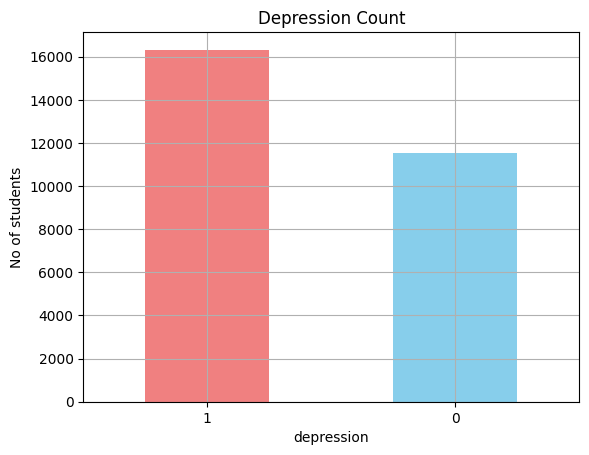

In [11]:
#  check depression distribution
df['depression'].value_counts().plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Depression Count')
plt.ylabel('No of students')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


In [12]:
#  check class imbalance
df['depression'].value_counts(normalize=True)

depression
1    0.585581
0    0.414419
Name: proportion, dtype: float64

About **59%** of the student in our dataset are depressed

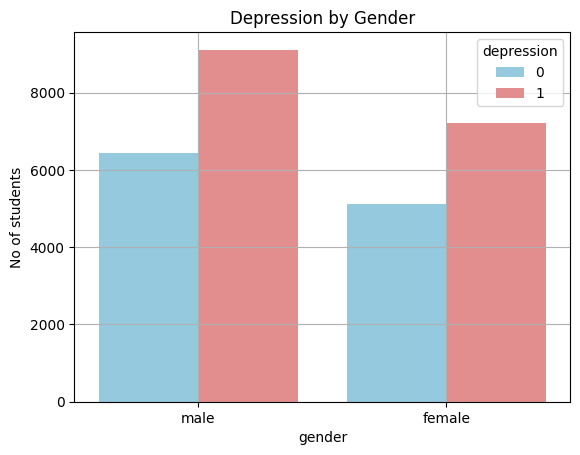

In [13]:
#  check depression by gender
sns.countplot(x='gender', hue = 'depression', data =df, palette = ['skyblue', 'lightcoral'])
plt.title('Depression by Gender')
plt.ylabel('No of students')
plt.grid(True)
plt.show()

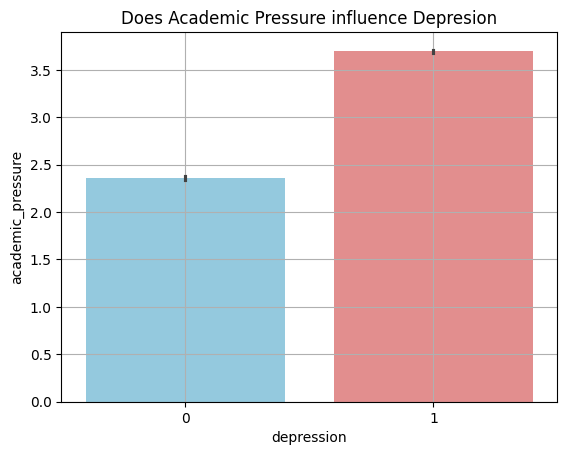

In [14]:
# academic pressure and depression
sns.barplot(x='depression', y='academic_pressure', data=df, palette=['skyblue', 'lightcoral'])
plt.title('Does Academic Pressure influence Depresion')
plt.grid(True)
plt.show()

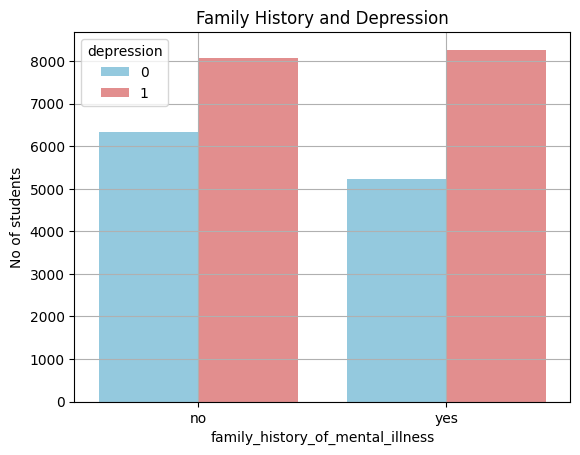

In [15]:
sns.countplot(x='family_history_of_mental_illness', hue='depression', data=df, palette=['skyblue', 'lightcoral'])
plt.title('Family History and Depression')
plt.ylabel('No of students')
plt.grid(True)
plt.show()

In [16]:
# sucidal tought and depression
pd.crosstab(df['have_you_ever_had_suicidal_thoughts_?'], df['depression'], normalize='index') * 100


depression,0,1
have_you_ever_had_suicidal_thoughts_?,,
no,76.775769,23.224231
yes,20.946444,79.053556


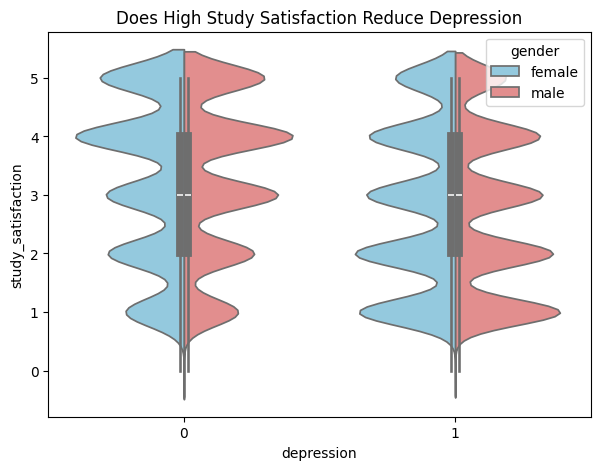

In [17]:
# study satisfaction and depression
plt.figure(figsize = (7,5))

sns.violinplot(x='depression', y='study_satisfaction', hue='gender', data=df, split=True, palette=['skyblue', 'lightcoral'])

plt.title('Does High Study Satisfaction Reduce Depression')
plt.show()

### Feature importance

In [18]:
# numerical and categorical features 

numerical = ['age', 'academic_pressure', 'work_pressure', 'cgpa',
       'study_satisfaction', 'job_satisfaction', 'sleep_duration',
       'work/study_hours', 'financial_stress']

categorical = ['gender', 'city', 'profession', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_?',
 'family_history_of_mental_illness']

In [19]:
# features correlation with depression
corr_matrix = df[numerical].corrwith(df['depression'])
corr_matrix.sort_values(ascending=False)

academic_pressure     0.474891
financial_stress      0.363400
work/study_hours      0.208675
cgpa                  0.022057
work_pressure        -0.003354
job_satisfaction     -0.003486
sleep_duration       -0.051433
study_satisfaction   -0.167956
age                  -0.226475
dtype: float64

In [20]:
#  function checking categorical features importance
def mutual_info_depress(series):
    return mutual_info_score(series, df['depression'] )

In [21]:
ml = df[categorical].apply(mutual_info_depress)
ml.sort_values(ascending =False)

have_you_ever_had_suicidal_thoughts_?    0.154635
dietary_habits                           0.021893
degree                                   0.009786
city                                     0.003561
family_history_of_mental_illness         0.001421
profession                               0.000359
gender                                   0.000002
dtype: float64

We should remove least correlated feature from our dataset to optimize our model performance. Features like `work_pressure`, `job_satisfaction`, `gender`, `profession`, `family_history_of_mental_illness`, and `city` are less important to the response variable (`depression`)

In [22]:
# Drop the less important features
df.drop(columns = ['work_pressure', 'job_satisfaction', 'gender','profession','family_history_of_mental_illness','city'], inplace=True)
df.head()

,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,depression
0,33.0,5.0,8.97,2.0,0,healthy,b.pharm,yes,3.0,1.0,1
1,24.0,2.0,5.90,5.0,0,moderate,bsc,no,3.0,2.0,0
2,31.0,3.0,7.03,5.0,1,healthy,ba,no,9.0,1.0,0
3,28.0,3.0,5.59,2.0,2,moderate,bca,yes,4.0,5.0,1
4,25.0,4.0,8.13,3.0,0,moderate,m.tech,yes,1.0,1.0,0


### Setting validation framework

In [23]:
# split dataset into test, train and validation
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [24]:
# predictors variables (train, test, validation)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [25]:
# Target variables (train, test, validation)
y_train = df_train['depression'].values
y_test = df_test['depression'].values
y_val = df_val['depression'].values

In [26]:
# Remove the target variable from the predictor variables
del df_train['depression']
del df_test['depression']
del df_val['depression']

In [27]:
# new numerical and categorical features 
num = ['age', 'academic_pressure', 'cgpa',
       'study_satisfaction','sleep_duration',
       'work/study_hours', 'financial_stress']

cat = ['dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_?']

### One-hot enconding

In [28]:
train_dicts = df_train[cat+num].to_dict(orient='records')
val_dicts = df_val[cat+num].to_dict(orient='records')

# intialize dictionary vectorizer
dv = DictVectorizer(sparse = False)

# fit and transform the dictionary vectorizer
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

### Model Traning

#### Logistic Regression
- **Baseline Model**

In [29]:
# Initialize and train the Logistic Regression model using the training dataset
lr = LogisticRegression() 
lr.fit(X_train, y_train)  

# Predict the probabilities for the validation set
y_pred = lr.predict_proba(X_val)[:, 1]  

# Calculate the ROC AUC score to evaluate the model's performance on the validation set
roc_auc = roc_auc_score(y_val, y_pred)
roc_auc

0.9176477251569101

In [30]:
# Generate an array of threshold values from 0 to 1, with 21 equally spaced values
thresholds = np.linspace(0, 1, 21)

# Initialize an empty list to store accuracy scores
scores = []

# Iterate over each threshold value to calculate accuracy at that threshold
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)  
    print('%.2f %.3f' % (t, score))  
    scores.append(score)  


0.00 0.583
0.05 0.698
0.10 0.751
0.15 0.785
0.20 0.803
0.25 0.820
0.30 0.832
0.35 0.840
0.40 0.845
0.45 0.845
0.50 0.844
0.55 0.844
0.60 0.839
0.65 0.831
0.70 0.820
0.75 0.806
0.80 0.787
0.85 0.755
0.90 0.704
0.95 0.606
1.00 0.417


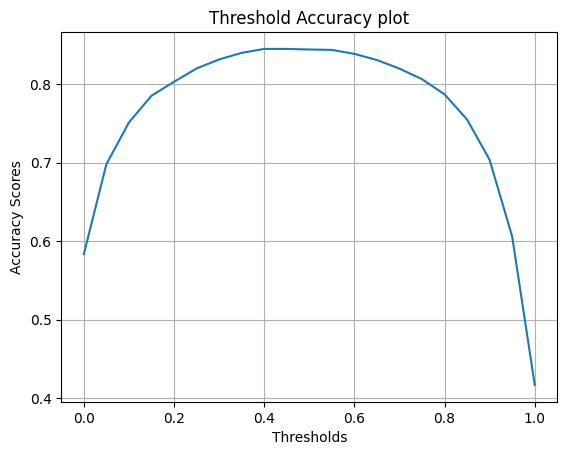

In [31]:
# Plot the accuracy scores against the threshold values
plt.plot(thresholds, scores)  

plt.title('Threshold Accuracy plot')
plt.xlabel('Thresholds')
plt.ylabel('Accuracy Scores')
plt.grid(True)
plt.show()


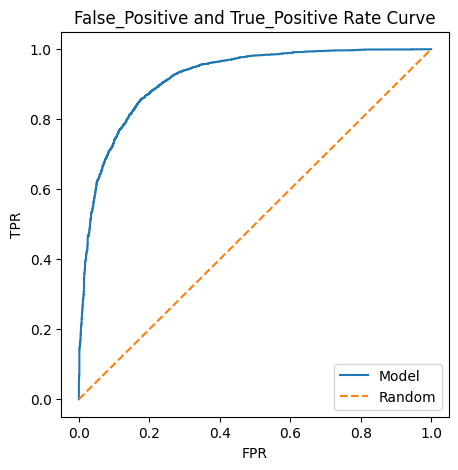

In [32]:
# Predict the probabilities for the positive class on the validation set
y_pred = lr.predict_proba(X_val)[:, 1]

# Set the figure size for the plot
plt.figure(figsize=(5, 5))

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Plot the ROC curve for the model
plt.plot(fpr, tpr, label='Model')

# Plot the random classifier diagonal (FPR = TPR)
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.title('False_Positive and True_Positive Rate Curve')
plt.xlabel('FPR')  
plt.ylabel('TPR')
plt.legend()
plt.show()


- **Logisitc Regression Hyperparameter Tuning**

In [33]:

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100]
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Perform GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'C': 0.1}


In [34]:
# Retrain model

# Initialize and train the Logistic Regression model using the training dataset
lr = LogisticRegression(C=0.1, solver='lbfgs', max_iter=1000) 
lr.fit(X_train, y_train)  

# Predict the probabilities for the validation set
y_pred = lr.predict_proba(X_val)[:, 1]  

# Calculate the ROC AUC score to evaluate the model's performance on the validation set
roc_auc = roc_auc_score(y_val, y_pred)
roc_auc

0.9177314916698637

### Decision Tree
- **Baseline Model**

In [35]:
# Initialize DecisionTreeClassifier with default parameters
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1)

# Train the model on training data
dt.fit(X_train, y_train)

# Predict probabilities for the positive class on validation data
y_dt_pred = dt.predict_proba(X_val)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_val, y_dt_pred)
auc

0.7717475004694497

### Decision Tree Hyperparameter Tuning
- **Finding the best max_depth and min_samples_leaf**

In [36]:
# Initialize an empty list to store scores
scores = []

# Loop over different max_depth and min_samples_leaf values
for depth in range(1, 8):  # Depth from 1 to 7
    for leaf in [1, 5, 10, 15, 20, 500, 100, 200]:  # Different values for min_samples_leaf
        # Initialize and train the DecisionTreeClassifier
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf)
        dt.fit(X_train, y_train)

        # Predict probabilities for the positive class on validation data
        y_dt_pred = dt.predict_proba(X_val)[:, 1]

        # Calculate AUC score
        auc = roc_auc_score(y_val, y_dt_pred)
    
        # Append the depth, leaf, and AUC score to the scores list
        scores.append((depth, leaf, auc))


In [37]:
# Convert the scores list into a DataFrame with columns for max_depth, min_samples_leaf, and auc
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])

# Pivot the DataFrame to create a matrix with min_samples_leaf as rows, max_depth as columns, and AUC as values
df_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc')
df_pivot.round(3)

max_depth,1,2,3,4,5,6,7
min_samples_leaf,,,,,,,
1,0.766,0.841,0.873,0.886,0.892,0.896,0.896
5,0.766,0.841,0.873,0.886,0.892,0.896,0.899
10,0.766,0.841,0.873,0.886,0.892,0.897,0.899
15,0.766,0.841,0.873,0.886,0.892,0.897,0.900
20,0.766,0.841,0.873,0.886,0.892,0.897,0.900
100,0.766,0.841,0.873,0.886,0.893,0.897,0.900
200,0.766,0.841,0.873,0.886,0.893,0.897,0.898
500,0.766,0.841,0.873,0.884,0.889,0.891,0.892


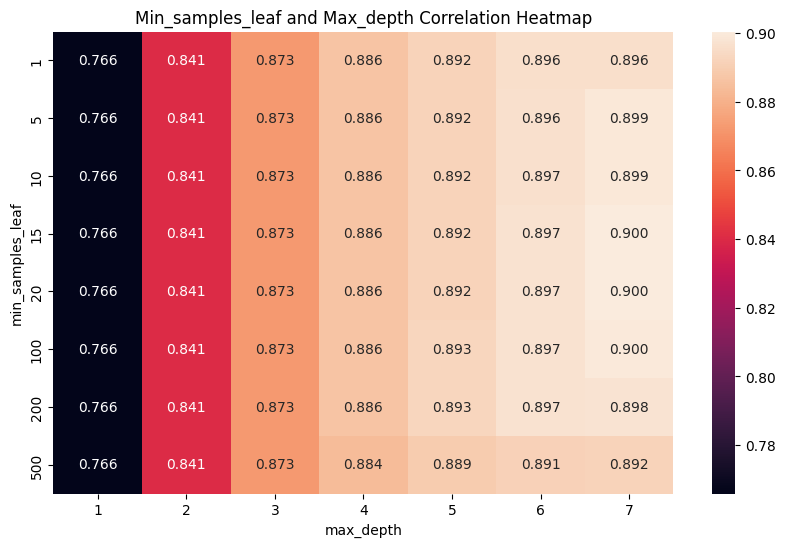

In [38]:
# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap of the pivoted DataFrame with AUC values annotated
sns.heatmap(df_pivot, annot=True, fmt=".3f")

plt.title('Min_samples_leaf and Max_depth Correlation Heatmap')
plt.show()

In [39]:
# Initialize the DecisionTreeClassifier with specified parameters
dt1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

# Train the model on the training data
dt1.fit(X_train, y_train)

# Predict probabilities for the positive class on validation data
y_dt1_pred_proba = dt1.predict_proba(X_val)[:, 1]

# Calculate the AUC score to evaluate the model's performance
roc_auc_score(y_val, y_dt1_pred_proba)


0.9000462369978294

### Random Forest
- **Baseline Model**

In [40]:
# Initialize the RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=None)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict probabilities for the positive class on validation data
y_rand_pred = rf.predict_proba(X_val)[:, 1]

# Calculate the AUC score to evaluate the model's performance
auc = roc_auc_score(y_val, y_rand_pred)
auc

0.9100517698223263

### Random Forest Hyperparameter Tuning
- **Finding the best max_depth and min_samples_leaf**

In [41]:
# Initialize an empty list to store scores
scores = []

# Loop over different max_depth values and n_estimators values
for d in [5, 10, 15]:  
    for n in range(10, 201, 10):  
        # Initialize and train the RandomForestClassifier
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        # Predict probabilities for the positive class on validation data
        y_rand_pred = rf.predict_proba(X_val)[:, 1]

        # Calculate the AUC score
        auc = roc_auc_score(y_val, y_rand_pred)

        # Append the max_depth, n_estimators, and AUC score to the scores list
        scores.append((d, n, auc))


In [42]:
# Convert the scores list into a DataFrame with columns for max_depth, n_estimators, and auc
df_sco = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])

# Display the first 5 rows of the DataFrame
df_sco.head()

,max_depth,n_estimators,auc
0,5,10,0.898184
1,5,20,0.902054
2,5,30,0.901547
3,5,40,0.901155
4,5,50,0.901813


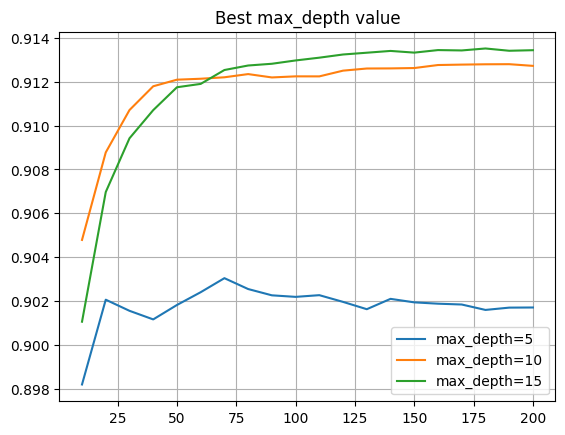

In [43]:
# Loop over different max_depth values (5, 10, 15)
for d in [5, 10, 15]:
    # Filter the DataFrame for the current max_depth value
    df_subset = df_sco[df_sco['max_depth'] == d]
    
    # Plot AUC against n_estimators for the subset
    plt.plot(df_subset['n_estimators'], df_subset['auc'], label='max_depth=%d' % d)

# Display legend to differentiate the lines
plt.legend()
plt.title('Best max_depth value')
plt.grid(True)
plt.show()

- **Finding the best min_samples_leaf**

In [44]:
# Set max_depth value and n_estimator to 15 and 200 as gotten above respectively
max_depth = 15
n_estimator = 200

# Initialize an empty list to store scores
scores = []

# Loop over different min_samples_leaf values and n_estimators values
for s in [1, 3, 4, 10, 50]:  
    # Initialize and train the RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=n_estimator, 
                                    max_depth=max_depth, 
                                    min_samples_leaf=s, 
                                    random_state=1)
    rf.fit(X_train, y_train)

    # Predict probabilities for the positive class on validation data
    y_rand_pred = rf.predict_proba(X_val)[:, 1]

    # Calculate the AUC score
    auc = roc_auc_score(y_val, y_rand_pred)

    # Append the min_samples_leaf, n_estimators, and AUC score to the scores list
    scores.append((s, auc))


In [45]:
# Convert the scores list into a DataFrame with columns for min_samples_leaf, n_estimators, and auc
df_leaf = pd.DataFrame(scores, columns=['min_samples_leaf', 'auc'])

# Display the first 5 rows of the DataFrame
df_leaf.head()


,min_samples_leaf,auc
0,1,0.913445
1,3,0.914336
2,4,0.914552
3,10,0.913011
4,50,0.907214


In [46]:
# Set min_samples_leaf value to 3 as determined earlier
min_samples_leaf = 3
max_depth = 15
n_estimators = 200


# Initialize the RandomForestClassifier with specified parameters
rf1 = RandomForestClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             min_samples_leaf=min_samples_leaf, 
                             random_state=1)

# Train the model on the training data
rf1.fit(X_train, y_train)

# Predict probabilities for the positive class on the validation data
y_rf1_pred_proba = rf1.predict_proba(X_val)[:, 1]

# Calculate and return the AUC score to evaluate model performance
roc_auc_score(y_val, y_rf1_pred_proba)

0.9143355734148643

### XGBoost

In [47]:
# Get the feature names from the vectorizer and convert them to a list
features = dv.get_feature_names_out().tolist()

# Create DMatrix for the training set with labels and feature names
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

# Create DMatrix for the validation set with labels and feature names
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [48]:
# Define XGBoost hyperparameters with default values
xgb_params = {
    'objective': 'binary:logistic', 
    'eval_metric': 'auc', 
    'verbosity': 1,                
    'seed': 0                       
}

# Train the XGBoost model using the default parameters
model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=10)  

# Predict the probabilities for the validation set
y_xgb_pred = model_xgb.predict(dval)

# Calculate the ROC AUC score to evaluate model performance
roc_auc = roc_auc_score(y_val, y_xgb_pred)
roc_auc

0.9139254086330324

In [49]:
# Define the watchlist to track model performance during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [50]:
%%capture output
xgb_params = {
    'objective': 'binary:logistic', 
    'eval_metric': 'auc', 
    'verbosity': 1,                
    'seed': 0                       
}
    

model_xgb = xgb.train(xgb_params, dtrain, 
                   verbose_eval =5,
                   evals = watchlist,
                   num_boost_round =200)

In [51]:
# Define a function to parse the output of the XGBoost training process
def parse_xgb_output(output):
    results = []  

    # Loop through each line of the output
    for line in output.stdout.strip().split('\n'):
        # Split each line into parts (iteration, train AUC, validation AUC)
        it_line, train_line, val_line = line.split('\t')

        # Extract iteration number, training AUC, and validation AUC
        it = int(it_line.strip('[]'))  
        train = float(train_line.split(':')[1])  
        val = float(val_line.split(':')[1])  

        # Append the parsed data as a tuple to the results list
        results.append((it, train, val))

    # Convert the list of results into a DataFrame with appropriate column names
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results  


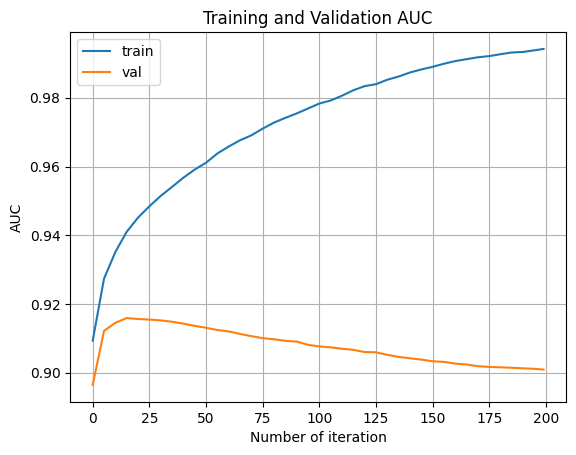

In [52]:
# Parse the XGBoost output to get training and validation AUC scores
df_score = parse_xgb_output(output)

# Plot the training AUC and validation AUC against the number of iterations
plt.plot(df_score['num_iter'], df_score['train_auc'], label='train')  
plt.plot(df_score['num_iter'], df_score['val_auc'], label='val')     

# Display the legend to differentiate the plots
plt.legend()
plt.ylabel('AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Number of iteration')
plt.grid(True)
plt.show()

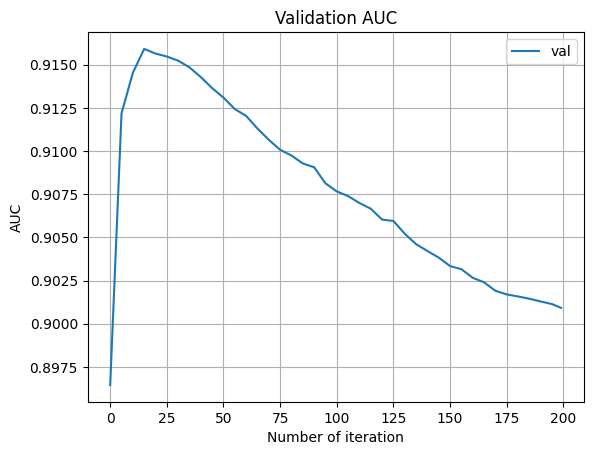

In [53]:
# Plot the validation AUC against the number of iterations
plt.plot(df_score['num_iter'], df_score['val_auc'], label='val')  # Plot validation AUC

# Display the legend to label the validation curve
plt.legend()
plt.ylabel('AUC')
plt.title('Validation AUC')
plt.xlabel('Number of iteration')
plt.grid(True)
plt.show()

### XGBoost Hyperparameter Tuning
- **Finding the best eta, max_depth and min_child_weight**
  >- **Finding the best eta value**

In [54]:
scores = {}

In [68]:
%%capture output  

# XGBoost hyperparameters
xgb_params = {
    'eta': 1.0,  
    'max_depth': 6, 
    'min_child_weight': 1, 
    'objective': 'binary:logistic',  
    'eval_metric': 'auc',
    'nthread': 8,  
    'seed': 1,  
    'verbosity': 1,  
}

# Train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,  
                  evals=watchlist)  


In [69]:
# Create a key string using the eta value from xgb_params
key = 'eta=%s' % (xgb_params['eta'])

# Store parsed output using the key
scores[key] = parse_xgb_output(output)

In [70]:
# Display the keys of the scores dictionary
scores.keys()

dict_keys(['eta=0.05', 'eta=0.01', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

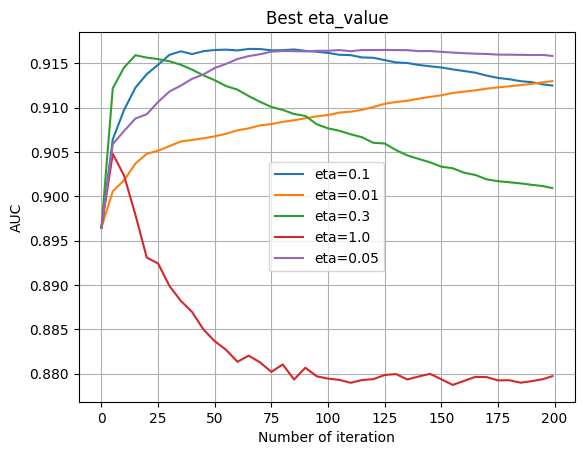

In [72]:
# List of eta values to plot
etas = ['eta=0.1', 'eta=0.01', 'eta=0.3', 'eta=1.0','eta=0.05']

# Loop through each eta value and plot the corresponding AUC values
for eta in etas:
    df_score = scores[eta]  
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)  

# Display the legend
plt.legend()
plt.title('Best eta_value')
plt.xlabel('Number of iteration')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


The `eta=0.05` curve achieves the highest and most stable validation AUC score across all iterations. This suggests that the model is learning effectively and achieving better generalization on the validation set.

- **Finding the best max_depth**

In [73]:
# Initialize an empty dictionary to store scores
scores = {}

In [83]:
%%capture output  

# Define XGBoost hyperparameters using tuned values of eta
xgb_params = {
    'eta': 0.05,  
    'max_depth': 15,  
    'min_child_weight': 1,  
    'objective': 'binary:logistic', 
    'eval_metric': 'auc',  
    'nthread': 8,  
    'seed': 1,  
    'verbosity': 1,  
}

# Train the XGBoost model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,  
                  evals=watchlist) 


In [84]:
# Create a key string using the max_depth value from xgb_params
key = 'max_depth=%s' % (xgb_params['max_depth'])

# Store parsed output using the key
scores[key] = parse_xgb_output(output)

In [85]:
# Display the keys of the scores dictionary
scores.keys()

dict_keys(['max_depth=3', 'max_depth=6', 'max_depth=10', 'max_depth=15'])

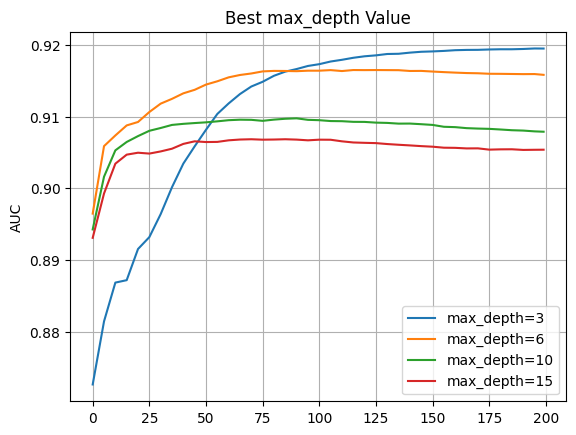

In [88]:
# Loop through each max_depth and its corresponding score data
for max_depth, df_score in scores.items():
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=max_depth) 

# Display the legend
plt.legend()
plt.title('Best max_depth Value')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


The `max_depth=6` curve achieves high validation AUC and maintains stability throughout the iterations. However, `max_depth=3` shows slower growth and lower final validation AUC compared to `max_depth=6`.

- **Finding the best min_child_weight** 

In [89]:
# Initialize an empty dictionary to store scores
scores = {}

In [99]:
%%capture output  


# Define XGBoost hyperparameters using tuned values of eta and max_depth
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,  
    'min_child_weight': 15,  
    'objective': 'binary:logistic',  
    'eval_metric': 'auc',  
    'nthread': 8, 
    'seed': 1,  
    'verbosity': 1,  
}

# Train the XGBoost model
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,  
                  evals=watchlist) 


In [100]:
# Create a key string using the min_child_weight value from xgb_params
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])

# Store the parsed output in the scores dictionary using the key
scores[key] = parse_xgb_output(output)


In [101]:
# Display the keys of the scores dictionary
scores.keys()

dict_keys(['min_child_weight=3', 'min_child_weight=5', 'min_child_weight=8', 'min_child_weight=15'])

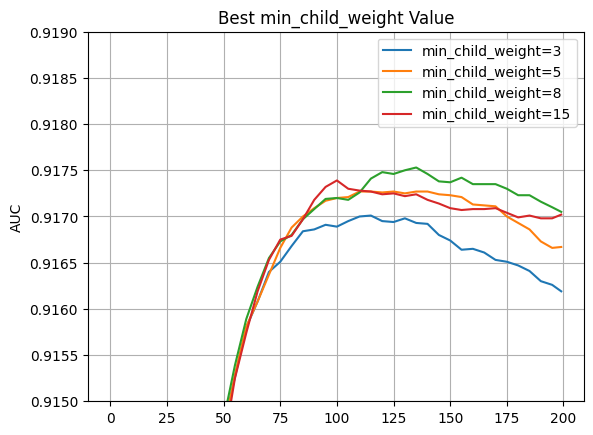

In [105]:
# Loop through each min_child_weight and its corresponding score data
for min_child_weight, df_score in scores.items():
    plt.plot(df_score['num_iter'], df_score['val_auc'], label=min_child_weight)

# Set the y-axis limits for the plot
plt.ylim(0.915, 0.919)

# Display the legend
plt.legend()
plt.title('Best min_child_weight Value')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


The best value for `min_child_weight` appears to be 8. It achieves a high validation AUC and maintains stability throughout the iterations without significant overfitting or underfitting. The `min_child_weight=5` curve performs similarly to 8 but starts to decline slightly earlier, making 8 the more stable choice.

**Determining the best `num_boost_round` using the `earlier_stopping` parameter**

In [106]:
# final XGBoost model after tuning with early stopping

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 8,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


# Train the model with early stopping after 10 rounds of no improvement in validation AUC
model = xgb.train(
    xgb_params, 
    dtrain, 
    num_boost_round=200, 
    evals=watchlist, 
    early_stopping_rounds=10
)

print(f"Optimal number of boosting rounds: {model.best_iteration}")


[0]	train-auc:0.90918	val-auc:0.89710
[1]	train-auc:0.91118	val-auc:0.90096
[2]	train-auc:0.91189	val-auc:0.90197
[3]	train-auc:0.91432	val-auc:0.90378
[4]	train-auc:0.91573	val-auc:0.90457
[5]	train-auc:0.91643	val-auc:0.90567
[6]	train-auc:0.91707	val-auc:0.90596
[7]	train-auc:0.91748	val-auc:0.90618
[8]	train-auc:0.91788	val-auc:0.90615
[9]	train-auc:0.91836	val-auc:0.90652
[10]	train-auc:0.91904	val-auc:0.90712
[11]	train-auc:0.91937	val-auc:0.90727
[12]	train-auc:0.91985	val-auc:0.90772
[13]	train-auc:0.92015	val-auc:0.90810
[14]	train-auc:0.92027	val-auc:0.90811
[15]	train-auc:0.92084	val-auc:0.90837
[16]	train-auc:0.92106	val-auc:0.90849
[17]	train-auc:0.92141	val-auc:0.90866
[18]	train-auc:0.92175	val-auc:0.90901
[19]	train-auc:0.92205	val-auc:0.90902
[20]	train-auc:0.92243	val-auc:0.90930
[21]	train-auc:0.92296	val-auc:0.90970
[22]	train-auc:0.92325	val-auc:0.90978
[23]	train-auc:0.92361	val-auc:0.91009
[24]	train-auc:0.92400	val-auc:0.91045
[25]	train-auc:0.92436	val-auc:0.91

>-  **final XGBoost model after tuning**

In [107]:
# XGBoost model training with tuned hyperparameters
xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 8,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Optimal number of boosting rounds: 99
model = xgb.train(xgb_params, dtrain, num_boost_round=99) 

# Make predictions on the validation set (dval)
y_pred = model.predict(dval)

# Calculate and print the ROC AUC score to evaluate the model's performance on the validation set
roc_auc_score(y_val, y_pred)

0.9172317377422661

### Model Comparison

In [108]:

# List to store the results
model_results = []

# 1. Logistic Regression Model Metrics
y_pred = lr.predict(X_val)  
y_pred_proba = lr.predict_proba(X_val)[:, 1]  

lr_auc = roc_auc_score(y_val, y_pred_proba)
lr_f1 = f1_score(y_val, y_pred)
lr_accuracy = accuracy_score(y_val, y_pred)
lr_precision = precision_score(y_val, y_pred)
lr_recall = recall_score(y_val, y_pred)

# Add Decision Tree results to the list
model_results.append({
    'Model': 'Logistic Regression',
    'AUC': lr_auc,
    'F1 Score': lr_f1,
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall
})


# 1. Decision Tree Model Metrics
y_dt1_pred = dt1.predict(X_val)  
y_dt_pred_proba = dt1.predict_proba(X_val)[:, 1]  

dt_auc = roc_auc_score(y_val, y_dt_pred_proba)
dt_f1 = f1_score(y_val, y_dt1_pred)
dt_accuracy = accuracy_score(y_val, y_dt1_pred)
dt_precision = precision_score(y_val, y_dt1_pred)
dt_recall = recall_score(y_val, y_dt1_pred)

# Add Decision Tree results to the list
model_results.append({
    'Model': 'Decision Tree',
    'AUC': dt_auc,
    'F1 Score': dt_f1,
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall
})


# 2. Random Forest Model Metrics
y_rf1_pred = rf1.predict(X_val)  
y_rf1_pred_proba = rf1.predict_proba(X_val)[:, 1] 

rf_auc = roc_auc_score(y_val, y_rf1_pred_proba)
rf_f1 = f1_score(y_val, y_rf1_pred)
rf_accuracy = accuracy_score(y_val, y_rf1_pred)
rf_precision = precision_score(y_val, y_rf1_pred)
rf_recall = recall_score(y_val, y_rf1_pred)

# Add Random Forest results to the list
model_results.append({
    'Model': 'Random Forest',
    'AUC': rf_auc,
    'F1 Score': rf_f1,
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall
})


# 3. XGBoost Model Metrics
y_xgb_pred = model.predict(dval) 

# Convert probabilities to binary labels using a threshold of 0.5
y_xgb_pred_binary = (y_xgb_pred >= 0.5).astype(int)

xgb_auc = roc_auc_score(y_val, y_xgb_pred)
xgb_f1 = f1_score(y_val, y_xgb_pred_binary)
xgb_accuracy = accuracy_score(y_val, y_xgb_pred_binary)
xgb_precision = precision_score(y_val, y_xgb_pred_binary)
xgb_recall = recall_score(y_val, y_xgb_pred_binary)

# Add XGBoost results to the list
model_results.append({
    'Model': 'XGBoost',
    'AUC': xgb_auc,
    'F1 Score': xgb_f1,
    'Accuracy': xgb_accuracy,
    'Precision': xgb_precision,
    'Recall': xgb_recall
})


# Convert the list to a DataFrame for comparison
df_results = pd.DataFrame(model_results)

# Display the comparison table
df_results


,Model,AUC,F1 Score,Accuracy,Precision,Recall
0,Logistic Regression,0.917731,0.869762,0.845050,0.853298,0.886874
1,Decision Tree,0.900046,0.859982,0.835725,0.855275,0.864740
2,Random Forest,0.914336,0.863123,0.836980,0.845927,0.881033
3,XGBoost,0.917232,0.869237,0.844871,0.855146,0.883800


### Testing the model on the Test Dataset

In [109]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train['depression']).astype(int).values
del df_full_train['depression']

In [110]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [111]:
lr.fit(X_full_train, y_full_train)

LogisticRegression(C=0.1, max_iter=1000)

In [113]:
y_pred = lr.predict(X_test)  
y_pred_proba = lr.predict_proba(X_test)[:, 1]  

lr_auc = roc_auc_score(y_test, y_pred_proba)
lr_f1 = f1_score(y_test, y_pred)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)

test = [{
    'Model': 'Logistic Regression',
    'AUC': lr_auc,
    'F1 Score': lr_f1,
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall
    }]

test = pd.DataFrame(test)
test

,Model,AUC,F1 Score,Accuracy,Precision,Recall
0,Logistic Regression,0.918952,0.87091,0.845768,0.860831,0.881227
